In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import os, sys, time
import random
import wandb

import numpy as np
import cv2
import matplotlib.pyplot as plt

from utils import read_yuv2gray, read_yuv2rgb, get_tensor_entries
from models import ALS_NN, LM_completion
import config

In [6]:
# Possible names "akiyo", "bus", "bridge"
dataset_name  = "akiyo"
dataset_full = config.datasets[dataset_name]
n_frames = 50
dim_y = 144
dim_z = 176
portion = 0.075
n_test_entries = 5000
n_val_entries = 5000
predict_frames = [20]
max_iter = 50
noisy = False
randominit = False
lambda_ = 1
n = (n_frames, dim_y, dim_z)
n_entries = int(n_frames*dim_y*dim_z*portion)
dataset = dataset_full[:n_frames]
seed = 2021

In [5]:
method_name = "ALS_NN"

entries_arr = get_tensor_entries(dataset, size=n_entries, seed=seed)
val_entries = get_tensor_entries(dataset, size=n_val_entries)
test_entries = get_tensor_entries(dataset, size=n_test_entries)

solver = config.solvers(method_name)
solver = solver(
    n=n,
    rank=rank,
    n_entries=n_entries,
    noisy=noisy,
    randominit=randominit,
    seed=seed,
    entries_arr=entries_arr
)

solution = solver.fit(
    max_iter=max_iter,
    test_entries=test_entries,
    lam=lambda_
)

In [7]:
pred = solver.predict(solution, predict_frames)

In [8]:
entries_arr_old = entries_arr.copy()

In [25]:
entries_arr = get_tensor_entries(dataset, size=n_entries, seed=seed)
val_entries = get_tensor_entries(dataset, size=n_val_entries)
test_entries = get_tensor_entries(dataset, size=n_test_entries)

solver = LM_completion(
    n=n,
    rank=rank,
    n_entries=n_entries,
    noisy=noisy,
    randominit=randominit,
    seed=seed,
    entries_arr=entries_arr
)

In [ ]:
solution = solver.fit(
    max_iter=max_iter,
    test_entries=test_entries,
    lam=lambda_
)

In [ ]:
pred_lm = solver.predict(solution, predict_frames)

In [9]:
pred_clipped = pred.clip(0., 256.)

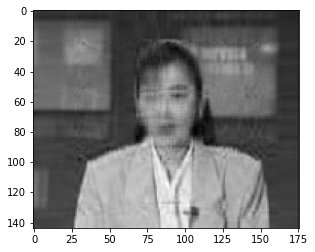

In [15]:
plt.imshow(pred_clipped[0], cmap='gray')

In [ ]:
pred_lm[0].clip(0, 256)
plt.imshow(pred_lm[0].clip(0, 256), cmap='gray')

In [7]:
dataset_full = read_yuv2gray(height=144, width=176, n_frames=2001, file_name='bridge-close_qcif.yuv', file_dir='data/')
dataset = dataset_full[:50]
                             

In [20]:
from PIL import Image
from matplotlib import cm
im = Image.fromarray(np.uint8(dataset_full[20]))

In [21]:
dataset_full[20]

array([[247., 253., 253., ..., 253., 253., 253.],
       [248., 253., 253., ..., 253., 253., 253.],
       [247., 253., 253., ..., 253., 253., 253.],
       ...,
       [196., 200., 199., ..., 212., 201., 191.],
       [176., 173., 183., ..., 198., 198., 192.],
       [113., 111., 118., ..., 110., 108., 109.]])

In [22]:
im.save("bridge_frame20.png")

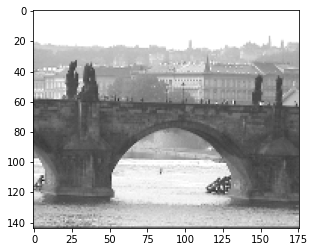

In [11]:
plt.imshow(dataset[20], cmap='gray')
plt.savefig("bridge_frame20.png")

In [9]:
plt.savefig("bridge_frame20.png")

<Figure size 432x288 with 0 Axes>